姓名：谈赛   学号：M201878095  班级：金融1806班

一.基本概念

二.策略代码

In [98]:
import talib as ta
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
start = '2016-01-01'                       # 回测起始时间
end = '2019-01-01'                         # 回测结束时间
universe = '300146'                 # 证券池，支持股票和基金、期货
freq = 'd'                                 # 'd'表示使用日频率回测，'m'表示使用分钟频率回测

short_term = 5
long_term = 20

In [100]:
data = ts.get_k_data(universe, start, end, freq)

close_price = np.array(data['close'])
time = np.array(data['date'])
L=[time[i] for i in range(0,612,60)]

# 计算均线数值
short_ma = ta.MA(close_price, short_term)
long_ma = ta.MA(close_price, long_term)


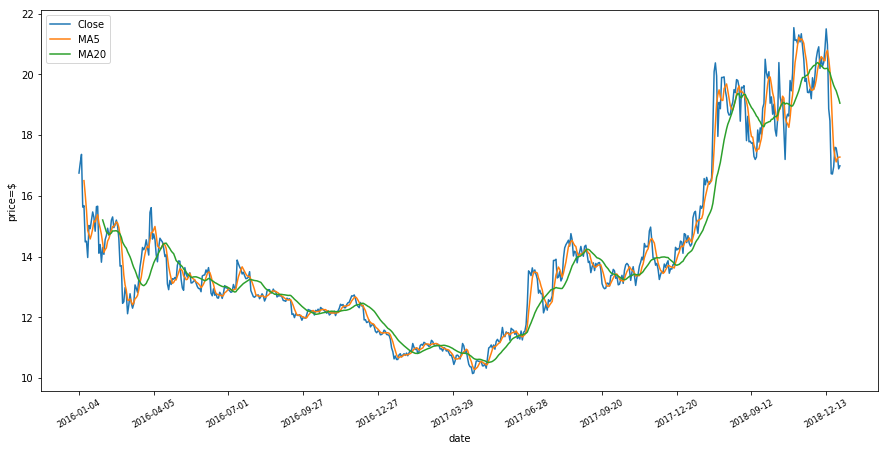

In [101]:
fig,ax=plt.subplots(figsize=(15,7))
ax.plot(time, close_price, label='Close')
ax.plot(time, short_ma, label='MA5')
ax.plot(time, long_ma, label='MA20')
ax.legend(loc='best')
ax.set_xticks(L)
ax.set_xlabel('date')
ax.set_ylabel('price=$')
plt.xticks(rotation=30,fontsize='small')
plt.show()

In [102]:
s = np.zeros(len(close_price))
for i in range(len(close_price)):
    if short_ma[i] > long_ma[i]:
        s[i] = 1
    else:
        s[i] = 0

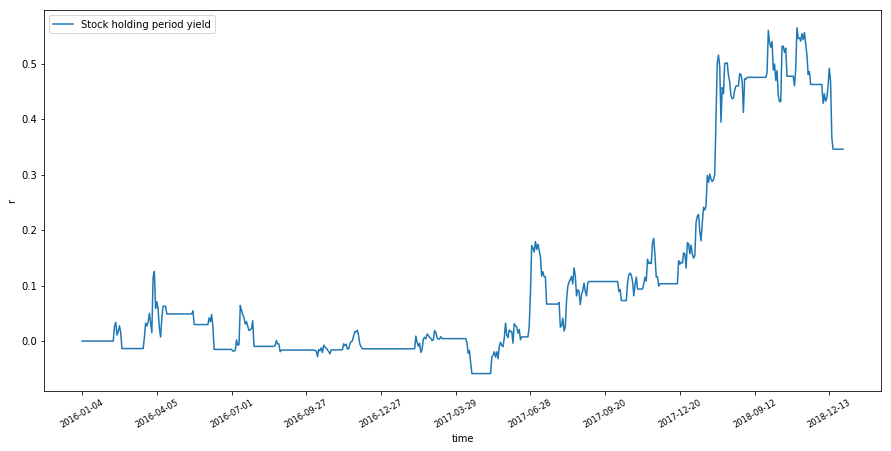

该策略的持有期收益率为0.34562255607260184


In [103]:
onedayr = (close_price[1:] - close_price[:-1])  / close_price[:-1]
onedayr = np.insert(onedayr, 0, 0)
r = s * onedayr

fig=plt.figure(figsize=(15,7))
ax=fig.add_subplot(111)
ax.plot(time,np.cumsum(r),label='Stock holding period yield')
ax.legend(loc='best')
ax.set_xlabel('time')
ax.set_ylabel('r')
ax.set_xticks(L)
plt.xticks(rotation=30,fontsize='small')
plt.show()
print('该策略的持有期收益率为'+str(np.cumsum(r)[-1]))

三.结论

In [ ]:
print('权重为',port_weights_array)